<a href="https://colab.research.google.com/github/zpalevani/nba2025/blob/main/NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nba_api


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.9/284.9 kB 6.4 MB/s eta 0:00:00


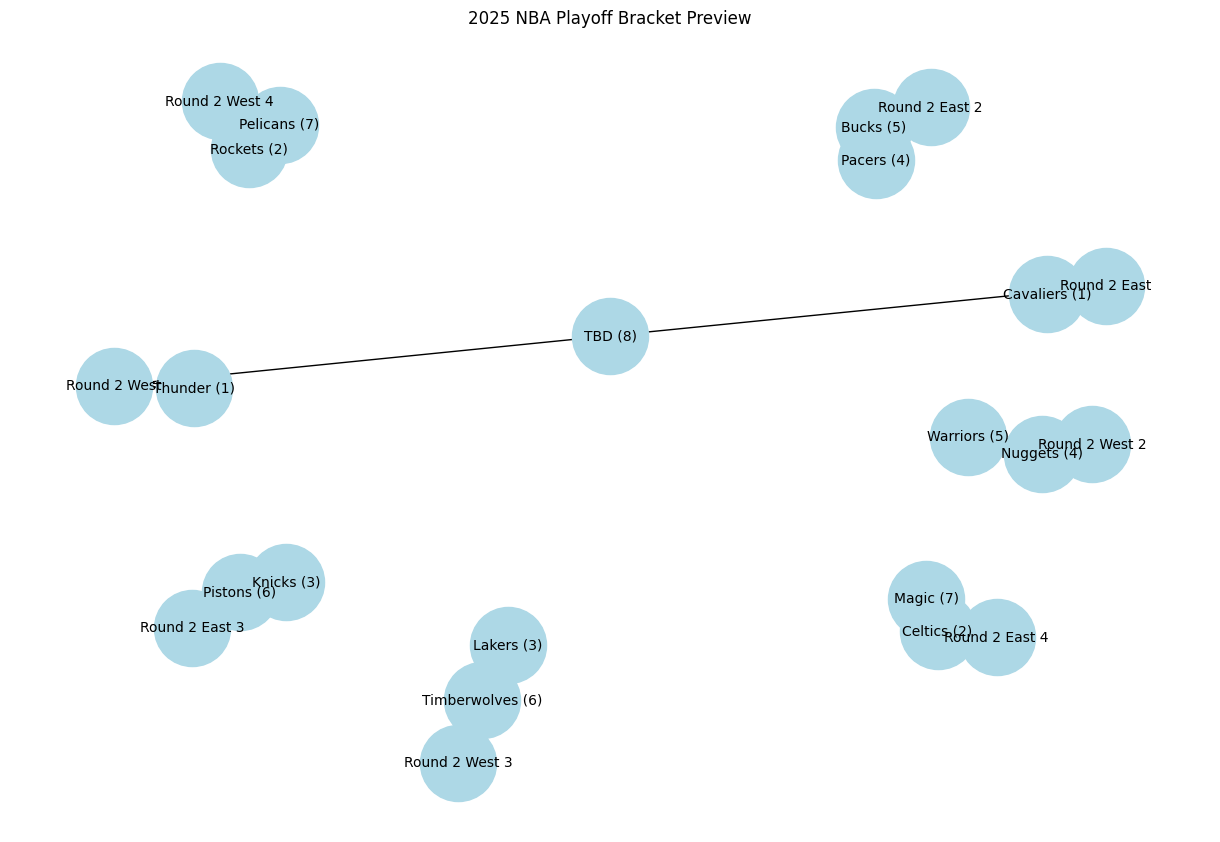

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Teams (simplified)
east = {
    '1': 'Cavaliers', '2': 'Celtics', '3': 'Knicks', '4': 'Pacers',
    '5': 'Bucks', '6': 'Pistons', '7': 'Magic', '8': 'TBD (Play-In)'
}
west = {
    '1': 'Thunder', '2': 'Rockets', '3': 'Lakers', '4': 'Nuggets',
    '5': 'Warriors', '6': 'Timberwolves', '7': 'Pelicans', '8': 'TBD (Play-In)'
}

# Create the bracket graph
G = nx.DiGraph()

# EAST Matchups
G.add_edge('Cavaliers (1)', 'Round 2 East')
G.add_edge('TBD (8)', 'Round 2 East')

G.add_edge('Pacers (4)', 'Round 2 East 2')
G.add_edge('Bucks (5)', 'Round 2 East 2')

G.add_edge('Knicks (3)', 'Round 2 East 3')
G.add_edge('Pistons (6)', 'Round 2 East 3')

G.add_edge('Celtics (2)', 'Round 2 East 4')
G.add_edge('Magic (7)', 'Round 2 East 4')

# WEST Matchups
G.add_edge('Thunder (1)', 'Round 2 West')
G.add_edge('TBD (8)', 'Round 2 West')

G.add_edge('Nuggets (4)', 'Round 2 West 2')
G.add_edge('Warriors (5)', 'Round 2 West 2')

G.add_edge('Lakers (3)', 'Round 2 West 3')
G.add_edge('Timberwolves (6)', 'Round 2 West 3')

G.add_edge('Rockets (2)', 'Round 2 West 4')
G.add_edge('Pelicans (7)', 'Round 2 West 4')

# Plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, node_size=3000, arrows=False)
plt.title("2025 NBA Playoff Bracket Preview")
plt.axis('off')
plt.show()



🏀 Power Rankings (by Win %):

        TeamName Conference  WinPCT  WINS  LOSSES  CurrentStreak
1        Thunder       West   0.831    64      13             -1
0      Cavaliers       East   0.805    62      15              3
2        Celtics       East   0.740    57      20              1
3        Rockets       West   0.654    51      27              2
5         Knicks       East   0.636    49      28              1
4         Lakers       West   0.610    47      30              1
6        Nuggets       West   0.603    47      31             -3
7         Pacers       East   0.597    46      31              3
8       Warriors       West   0.597    46      31              5
10  Timberwolves       West   0.590    46      32              5

🔥 Top 10 Scorers:

                 PLAYER_NAME TEAM_ABBREVIATION   PTS  AST  REB
488  Shai Gilgeous-Alexander               OKC  2416  471  370
29           Anthony Edwards               MIN  2056  342  428
422             Nikola Jokić               DE

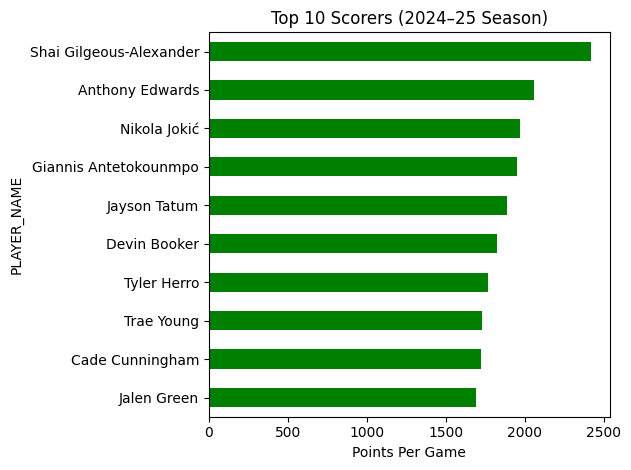

In [9]:
from nba_api.stats.endpoints import LeagueStandings, LeagueDashPlayerStats
import pandas as pd
import matplotlib.pyplot as plt

# Load current standings
standings = LeagueStandings().get_data_frames()[0]
teams = standings[['TeamName', 'Conference', 'WinPCT', 'WINS', 'LOSSES', 'CurrentStreak']]

# Load top player stats
players = LeagueDashPlayerStats(season='2024-25').get_data_frames()[0]
top_scorers = players[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'PTS', 'AST', 'REB']].sort_values(by='PTS', ascending=False).head(10)

# Print top teams by win %
print("\n🏀 Power Rankings (by Win %):\n")
print(teams.sort_values(by='WinPCT', ascending=False).head(10))

# Print top scorers
print("\n🔥 Top 10 Scorers:\n")
print(top_scorers)

# Plot top scorers
top_scorers.plot(kind='barh', x='PLAYER_NAME', y='PTS', color='green', legend=False)
plt.title("Top 10 Scorers (2024–25 Season)")
plt.xlabel("Points Per Game")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


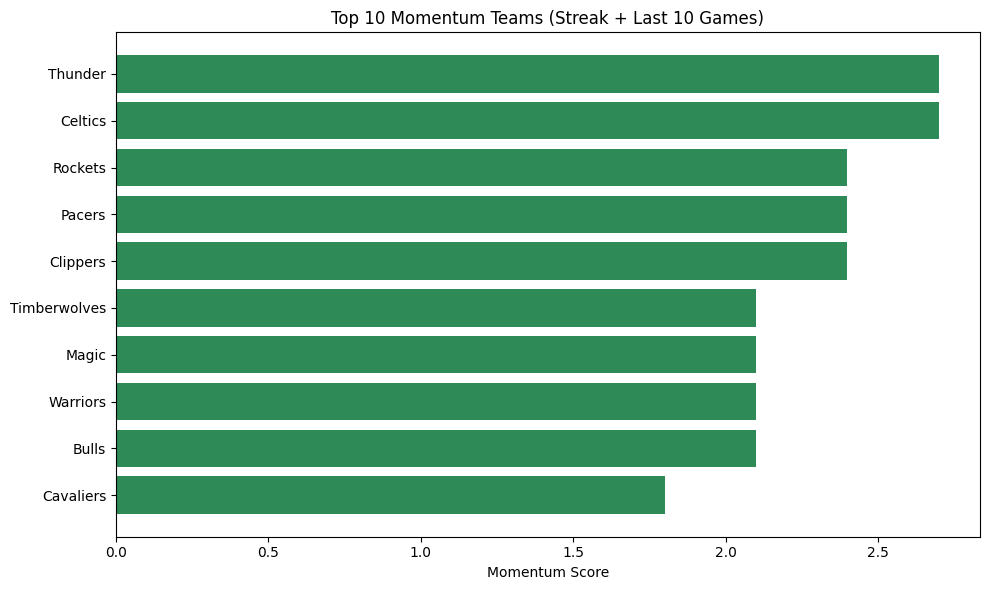

In [10]:
# This code pulls the current NBA standings and identifies the top 10 teams with the strongest momentum
# based on their current win streaks and their record over the last 10 games.

from nba_api.stats.endpoints import LeagueStandings
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch current NBA standings from nba_api
standings = LeagueStandings().get_data_frames()[0]

# Step 2: Extract columns needed for momentum analysis
momentum_data = standings[['TeamName', 'Conference', 'WINS', 'LOSSES', 'WinPCT', 'CurrentStreak', 'L10']].copy()

# Step 3: Convert L10 (e.g., '8-2') into numeric wins/losses
momentum_data[['L10_Wins', 'L10_Losses']] = momentum_data['L10'].str.split('-', expand=True).astype(int)

# Step 4: Convert win/loss streaks like 'W5' or 'L3' into numeric +5 or -3 values
def streak_to_int(streak):
    if isinstance(streak, str) and streak[0] in ['W', 'L']:
        return int(streak[1:]) * (1 if streak[0] == 'W' else -1)
    return 0

momentum_data['StreakValue'] = momentum_data['CurrentStreak'].apply(streak_to_int)

# Step 5: Combine StreakValue and Last 10 Wins into a custom "MomentumScore"
momentum_data['MomentumScore'] = (0.7 * momentum_data['StreakValue']) + (0.3 * momentum_data['L10_Wins'])

# Step 6: Select top 10 momentum teams based on the score
top_momentum = momentum_data.sort_values(by='MomentumScore', ascending=False).head(10)

# Step 7: Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_momentum['TeamName'], top_momentum['MomentumScore'], color='seagreen')
plt.xlabel('Momentum Score')
plt.title('Top 10 Momentum Teams (Streak + Last 10 Games)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


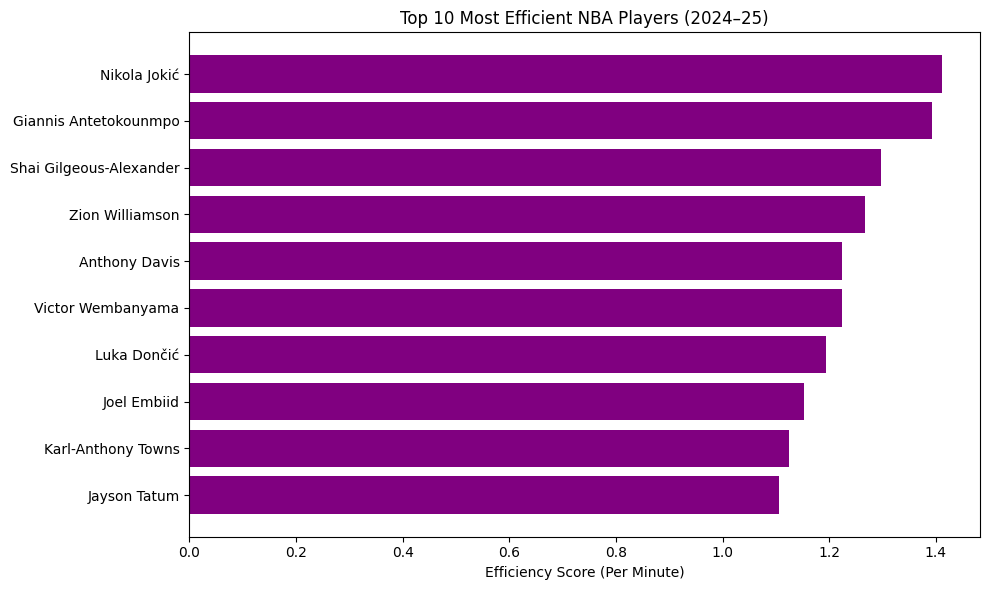

In [12]:
# This code calculates a basic Player Efficiency Score using common stats from the current NBA season
# and ranks the top 10 most efficient players based on their per-minute performance.

from nba_api.stats.endpoints import LeagueDashPlayerStats
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch player stats from the 2024–25 NBA season
players = LeagueDashPlayerStats(season='2024-25').get_data_frames()[0]

# Step 2: Select relevant columns for efficiency analysis
columns = ['PLAYER_NAME', 'TEAM_ABBREVIATION', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'MIN']
df = players[columns].copy()

# Step 3: Compute a custom Player Efficiency Score
# Formula: (PTS + REB + AST + STL + BLK - TOV) / MIN
df['EfficiencyScore'] = (df['PTS'] + df['REB'] + df['AST'] + df['STL'] + df['BLK'] - df['TOV']) / df['MIN']

# Step 4: Filter out players with low minutes (e.g., <500 total minutes) to remove noise
df = df[df['MIN'] > 500]

# Step 5: Sort the players by efficiency and get the top 10
top_efficiency = df.sort_values(by='EfficiencyScore', ascending=False).head(10)

# Step 6: Plot the top 10 most efficient players
plt.figure(figsize=(10, 6))
plt.barh(top_efficiency['PLAYER_NAME'], top_efficiency['EfficiencyScore'], color='purple')
plt.xlabel('Efficiency Score (Per Minute)')
plt.title('Top 10 Most Efficient NBA Players (2024–25)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


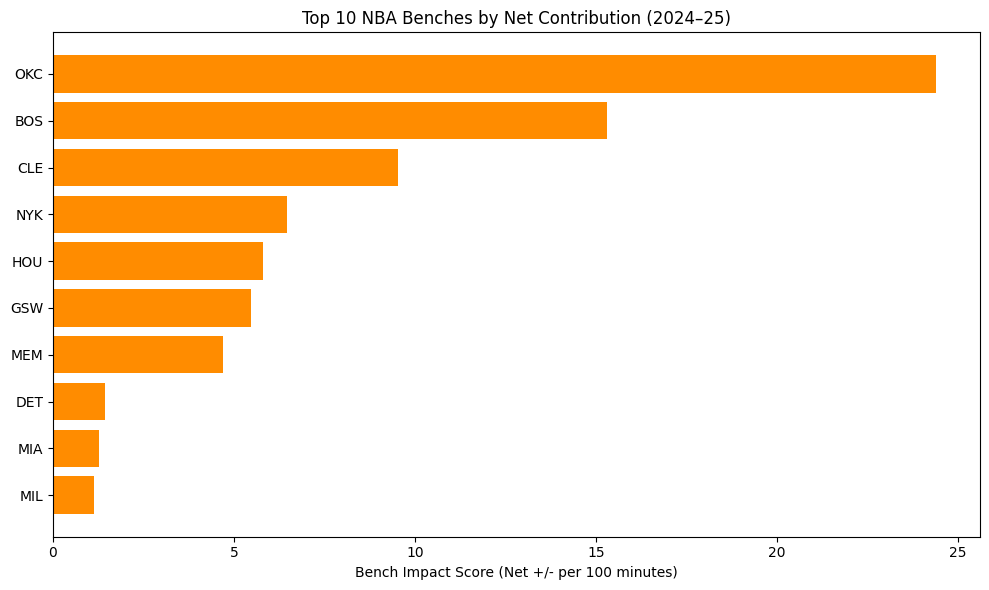

,TEAM_ABBREVIATION,PTS,MIN,PLUS_MINUS,BenchImpactScore
0,OKC,1581,4467.940000,1090,24.396030
1,BOS,1008,3295.103333,504,15.295423
2,CLE,2259,5880.573333,561,9.539886
3,NYK,1106,3247.698333,210,6.466118
4,HOU,1770,4507.030000,261,5.790953
5,GSW,1734,4479.313333,245,5.469588
6,MEM,1630,3820.771667,179,4.684917
7,DET,2113,5681.890000,81,1.425582
8,MIA,1134,3139.888333,40,1.273931
9,MIL,1486,4214.641667,48,1.138887


In [20]:
# This code recalculates bench contribution using avg minutes per game < 20 as a bench definition

from nba_api.stats.endpoints import LeagueDashPlayerStats
import pandas as pd
import matplotlib.pyplot as plt

# Fetch NBA player stats for the current season
players = LeagueDashPlayerStats(season='2024-25').get_data_frames()[0]

# Filter bench players: avg MIN < 20 and total MIN > 100 (to remove noise)
bench_players = players[(players['MIN'] / players['GP'] < 20) & (players['MIN'] > 100)].copy()

# Group by team and aggregate key stats
bench_stats = bench_players.groupby('TEAM_ABBREVIATION')[['PTS', 'MIN', 'PLUS_MINUS']].sum().reset_index()

# Avoid divide-by-zero
bench_stats = bench_stats[bench_stats['MIN'] > 0]

# Calculate Bench Impact Score = Net +/- per 100 minutes
bench_stats['BenchImpactScore'] = (bench_stats['PLUS_MINUS'] / bench_stats['MIN']) * 100

# Sort and select top 10 teams
top_benches = bench_stats.sort_values(by='BenchImpactScore', ascending=False).head(10)

top_benches = top_benches.reset_index(drop=True)


# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_benches['TEAM_ABBREVIATION'], top_benches['BenchImpactScore'], color='darkorange')
plt.xlabel('Bench Impact Score (Net +/- per 100 minutes)')
plt.title('Top 10 NBA Benches by Net Contribution (2024–25)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Show table
top_benches[['TEAM_ABBREVIATION', 'PTS', 'MIN', 'PLUS_MINUS', 'BenchImpactScore']]


🎯 **Strategic Implications:**

Coaches may want to shorten rotations for teams with negative or neutral bench scores.

Teams with elite benches (OKC, BOS) can afford to play high tempo or rest stars longer.

This stat could also impact 6th Man of the Year conversations, highlighting units rather than individuals.

**A strong bench influences team strategy:**

If a team has a high-impact bench like OKC or BOS:

Coaches can push the pace, knowing they have fresh legs.

Starters can get longer rests without losing momentum.

The team can sustain high-tempo systems or aggressive full-court defenses.

**If a team has a weak bench like MIL or MIA:**

Coaches might slow the pace, reduce substitutions, and lean on starters.

Opponents can exploit bench minutes and go on runs when starters rest.

In [23]:
# Check available columns to confirm naming
print(team_stats.columns.tolist())


['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK']


In [35]:
from nba_api.stats.endpoints import LeagueDashPlayerStats
import pandas as pd
import time
from requests.exceptions import ReadTimeout # Import ReadTimeout

# Step 1: Get player stats for this season, with retry logic
for attempt in range(3):  # Try 3 times
    try:
        players = LeagueDashPlayerStats(season='2024-25').get_data_frames()[0]
        break  # Exit loop if successful
    except ReadTimeout: # Now using the correct ReadTimeout exception
        if attempt < 2:  # Wait before retrying, unless it's the last attempt
            time.sleep(5)  # Wait 5 seconds
            print(f"Read timeout, retrying (attempt {attempt + 2} of 3)...")
        else:
            raise  # Re-raise the exception if all attempts fail

# Step 2: Filter for bench players: < 20 minutes per game and played at least 10 games
players['MPG'] = players['MIN'] / players['GP']
bench_players = players[(players['MPG'] < 20) & (players['GP'] >= 10)].copy()

# Step 3: Calculate custom Efficiency Score
# You can customize this formula based on what you value
bench_players['EfficiencyScore'] = (
    bench_players['PTS'] + bench_players['REB'] + bench_players['AST'] +
    bench_players['STL'] + bench_players['BLK'] - bench_players['TOV']
) / bench_players['MIN']

# Step 4: Sort and get top 10 bench performers
top_bench = bench_players.sort_values(by='EfficiencyScore', ascending=False).head(10)

# Step 5: Display key info
print(top_bench[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'GP', 'MPG', 'PTS', 'REB', 'AST', 'EfficiencyScore']])


               PLAYER_NAME TEAM_ABBREVIATION  GP        MPG  PTS  REB  AST  \
282      Jonas Valančiūnas               SAC  76  19.281294  798  598  157   
515           Tony Bradley               IND  11   5.344394   37   19    3   
406            Moses Brown               DAL  13   9.121282   76   44    2   
232            Jalen Smith               CHI  61  14.916120  497  336   61   
405          Moritz Wagner               ORL  30  18.805222  386  148   42   
358         Leonard Miller               MIN  12   2.569444   18   11    0   
332             Kevin Love               MIA  23  10.932754  122   94   22   
481  Sandro Mamukelashvili               SAS  56  10.325000  335  164   39   
386            Mason Jones               SAC  10   4.539167   23    9   11   
531       Tristan Vukcevic               WAS  32  13.248229  261  110   32   

     EfficiencyScore  
282         1.037275  
515         1.020611  
406         1.020437  
232         1.008921  
405         0.997950  
358